In [196]:
import numpy as np
from time import time
import torch
from matplotlib import pyplot as plt

In [186]:
img = np.arange(256)[:,np.newaxis]@np.ones(256)[np.newaxis,:]
kernel = np.array([[-1,0,1],[-2,0,7],[-1,0,1]])

In [187]:
x = kernel.shape[0]-1; y = kernel.shape[1]-1
p_img = img
#p_img = np.pad(img,((x,x),(y,y)))
a = (p_img.shape[0]-kernel.shape[0])//2
b = int(np.ceil((p_img.shape[0]-kernel.shape[0])/2))


p_img = torch.Tensor(p_img)
##Note: You can take the fft of the kernel and pad it ahead of time while testing since it is a constant.
p_kernel = np.zeros(img.shape)
x = t_kernel.shape[0]; y = t_kernel.shape[1]
p_kernel[:(x-x//2),:(y-y//2)] = kernel[(x//2):,(y//2):]
p_kernel[-(x//2):,:(y-y//2)] = kernel[:(x//2),(y//2):]
p_kernel[:(x-x//2),-(y//2):] = kernel[(x//2):,:(y//2)]
p_kernel[-(x//2):,-(y//2):] = kernel[:(x//2),:(y//2)]

padded_kernel = torch.fft.rfft2(torch.Tensor(p_kernel))


In [188]:
start_time = time()
out_fft = (torch.fft.rfft2(p_img) * padded_kernel)
out_fft = torch.fft.irfft2(out_fft)
print(time() - start_time)

0.0019731521606445312


In [189]:
img2 = torch.Tensor(img)
kernel2 = torch.Tensor(kernel)

img2 = torch.reshape(img2,(1,1,img2.shape[0],img2.shape[1]))
kernel2 = torch.reshape(kernel2,(1,1,kernel2.shape[0],kernel2.shape[1]))

In [190]:
start_time = time()
out_conv = torch.nn.functional.conv2d(img2,kernel2,padding=(1,1))
print(time() - start_time)

0.0035200119018554688


In [191]:
#Still working on debugging why they are not almost exactly equal
out_fft == out_conv

tensor([[[[False,  True,  True,  ...,  True,  True, False],
          [False,  True,  True,  ...,  True,  True, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False,  True,  True,  ...,  True,  True, False],
          [False,  True,  True,  ...,  True,  True, False],
          [False,  True,  True,  ...,  True,  True, False]]]])

In [206]:
print(f'Mean out_fft: {out_fft.mean()} | Variance out_fft: {out_fft.var()}')
print(f'Mean out_conv: {out_conv.mean()} | Variance out_conv: {out_conv.var()}')

Mean out_fft: 637.5 | Variance out_fft: 136533.328125
Mean out_conv: 635.009765625 | Variance out_conv: 143665.59375


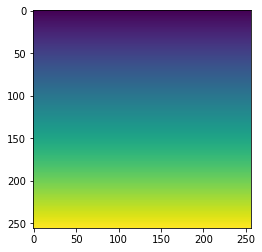

In [197]:
plt.imshow(out_fft)

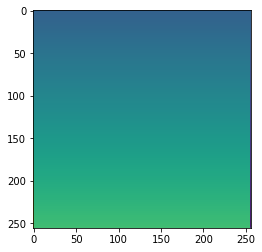

In [199]:
plt.imshow(out_conv[0,0])